In [14]:
import librosa
import librosa.display
import numpy as np
import acoustics
import scipy

In [2]:
from dataset import DataReader

In [3]:
train = DataReader(what='train')
validation = DataReader(what='validation')
test = DataReader(what='test')

generated/0.3/train/train_Torso_Acc_x.mmap exists, loading ...
generated/0.3/train/train_Torso_Acc_y.mmap exists, loading ...
generated/0.3/train/train_Torso_Acc_z.mmap exists, loading ...
generated/0.3/train/train_Torso_Mag_x.mmap exists, loading ...
generated/0.3/train/train_Torso_Mag_y.mmap exists, loading ...
generated/0.3/train/train_Torso_Mag_z.mmap exists, loading ...
generated/0.3/train/train_Torso_Pressure.mmap exists, loading ...
generated/0.3/train/train_Torso_Acc_m.mmap exists, loading ...
generated/0.3/train/train_Torso_Gyr_m.mmap exists, loading ...
generated/0.3/train/train_Torso_Mag_m.mmap exists, loading ...
generated/0.3/train/train_Torso_Ori_m.mmap exists, loading ...
generated/0.3/train/train_Torso_Gra_m.mmap exists, loading ...
generated/0.3/train/train_Torso_LAcc_m.mmap exists, loading ...
generated/0.3/train/train_Hips_Acc_x.mmap exists, loading ...
generated/0.3/train/train_Hips_Acc_y.mmap exists, loading ...
generated/0.3/train/train_Hips_Acc_z.mmap exists, loa

In [5]:
print(train.X['Hips']['Acc_x'].shape)

(196072, 500)


In [6]:
import matplotlib
import matplotlib.pyplot as plt

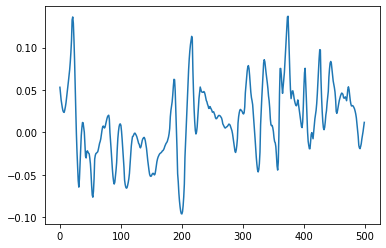

In [7]:
plt.plot(train.X['Hips']['Acc_x'][1])

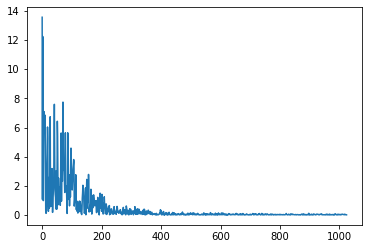

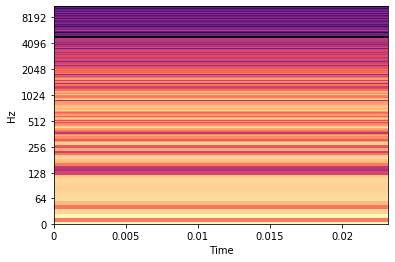

In [8]:
D = np.abs(librosa.core.stft(train.X['Hips']['Acc_x'][1]))
plt.plot(D)
plt.show()
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')

(250,)


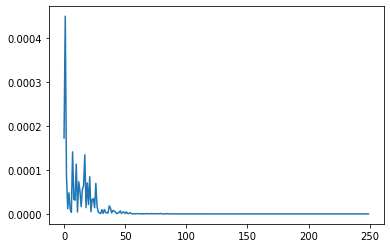

In [9]:
spectrum = acoustics.signal.power_spectrum(train.X['Hips']['Acc_x'][1], fs=100, N=500)  # N=500 number of FFT bins
plt.plot(spectrum[1])
print(spectrum[1].shape)

## Highest magnitude of the fft window:

In [10]:
np.max(D)

13.569549

## frequency where the highest magnitude magnitude is located

In [15]:
np.argmax(D)
scipy.signal.find_peaks(D[:, 0])

(array([   2,    6,   10,   18,   23,   27,   31,   33,   41,   47,   51,
          55,   58,   60,   64,   66,   70,   78,   80,   86,   91,   94,
          97,  106,  111,  113,  117,  119,  125,  127,  137,  146,  150,
         154,  156,  160,  164,  168,  173,  179,  185,  187,  191,  193,
         195,  199,  201,  203,  209,  215,  220,  223,  226,  228,  232,
         234,  240,  242,  248,  250,  252,  255,  257,  260,  263,  267,
         271,  273,  275,  279,  283,  287,  289,  295,  298,  301,  304,
         306,  310,  312,  314,  318,  320,  322,  326,  328,  334,  339,
         343,  347,  351,  353,  357,  363,  369,  372,  375,  378,  384,
         386,  396,  398,  400,  404,  408,  411,  417,  421,  423,  427,
         433,  437,  439,  443,  449,  452,  455,  458,  460,  466,  468,
         472,  474,  476,  478,  482,  486,  490,  495,  499,  505,  509,
         517,  523,  529,  535,  538,  540,  544,  548,  550,  552,  554,
         558,  562,  566,  570,  573, 

## spectral entropy of the fft window

In [16]:
scipy.stats.entropy(spectrum[1])

3.0825685807796916

## Spectral Contrast

In [17]:
librosa.feature.spectral_contrast(train.X['Hips']['Acc_x'][1], sr=100, fmin=5, n_bands=4)

array([[20.93568013],
       [29.75647583],
       [23.74756844],
       [25.75159717],
       [22.63533204]])

In [18]:
librosa.feature.spectral_contrast(train.X['Hips']['Acc_x'][2], sr=100, fmin=5, n_bands=4)

array([[27.23871884],
       [23.86155251],
       [24.84215462],
       [30.06901129],
       [25.94624499]])

## Sub-Band Energy (10 sub-bands of 5Hz/bin each)

In [19]:
def subBandEnergy(spectrum):
    sb_energy = []
    for band in np.array_split(spectrum, 10):
        sb_energy.append(band.sum())
    return np.array(sb_energy)

## Total Energy of the FFT Window

In [20]:
print(D.shape)
D.sum()

(1025, 1)


460.42093

## Sub-Band Energy Ratio (relative to the total energy of the FFT window)

In [30]:
# compute sub-bands
#bands = acoustics.bands.octave(2.5, 47.5)  # 0Hz--2.5--5Hz-- ... --45Hz--47.5--50Hz (10 bands of 5Hz each)
#print(bands)
def subBandEnergyRatio(sbEnergy, spectrumEnergy):
    #spectrum_energy = spectrum.sum()
    sb_energy_ratio = []
    for sb in sbEnergy:
        sb_energy_ratio.append(sb/spectrumEnergy)
    return np.array(sb_energy_ratio)

## Sub-Band Spectral Entropy

In [22]:
def subBandSpectralEntropy(spectum):
    sb_spectral_entropy = []
    for band in np.array_split(spectrum, 10):
        #print(band)
        sb_spectral_entropy.append(scipy.stats.entropy(band))
    return np.array(sb_spectral_entropy)

## Cepstral Coefficients

[ 0.94860549  0.41198618  0.17123019  0.08262337  0.00114495  0.01636228
  0.05535528  0.00553388 -0.03623976 -0.01298434  0.018038    0.00366619
  0.00553515 -0.00432999 -0.00695939 -0.03380898 -0.03883254 -0.03570271
 -0.00527599  0.06512559]
(500,)


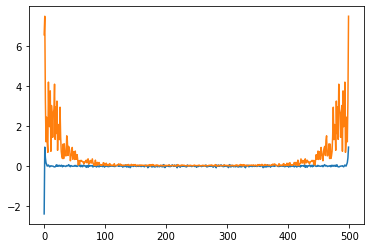

In [43]:
plt.plot(acoustics.cepstrum.real_cepstrum(train.X['Hips']['Acc_x'][1]))
plt.plot(np.abs(np.fft.fft(train.X['Hips']['Acc_x'][1])))

ceps = acoustics.cepstrum.real_cepstrum(train.X['Hips']['Acc_x'][1])
print(ceps[1:21])
print(ceps.shape)

def cepstralCoefficients(x):
    ceps = acoustics.cepstrum.real_cepstrum(x)
    return ceps

## first order difference of the cepstrum coefficients

In [25]:
def firstOrderDifference(ceps):
    #print(ceps.shape)
    #print(np.diff(ceps).shape)
    return np.diff(ceps)

## MFCC

In [26]:
librosa.feature.mfcc(train.X['Hips']['Acc_x'][1], sr=100)

array([[-6.1259674e+01],
       [ 1.3941342e+02],
       [ 5.5483559e+01],
       [ 2.5308743e+01],
       [ 1.1043497e+01],
       [ 1.9019841e+00],
       [ 7.9321346e+00],
       [ 2.7227845e+00],
       [-1.2521446e-02],
       [-2.0546727e+00],
       [-3.2798367e+00],
       [ 4.0511799e+00],
       [-2.9538214e-02],
       [ 2.4178205e+00],
       [ 3.4023213e+00],
       [-6.5195775e+00],
       [-6.1365871e+00],
       [-3.0920472e+00],
       [-2.6282387e+00],
       [-1.3191388e+00]], dtype=float32)

## All in all

### Magnetometer Spectrum Features

In [33]:
Mag_features = np.zeros((73,))  # 74 in the original paper but firstOrderDifference returns #ceps-1

x = train.X['Hips']['Mag_x'][1]
y = train.X['Hips']['Mag_y'][1]
z = train.X['Hips']['Mag_z'][1]

spectrum_x = acoustics.signal.power_spectrum(x, fs=100, N=500)[1]  # N=500 number of FFT bins
spectrum_y = acoustics.signal.power_spectrum(y, fs=100, N=500)[1]  # N=500 number of FFT bins
spectrum_z = acoustics.signal.power_spectrum(z, fs=100, N=500)[1]  # N=500 number of FFT bins

spectrum = spectrum_x # + spectrum_y + spectrum_z

Mag_features[0] = np.max(spectrum)  #1
Mag_features[1] = np.argmax(spectrum)  #2
Mag_features[2] = scipy.stats.entropy(spectrum)  #3
spectrumEnergy = spectrum.sum()
Mag_features[3] = spectrumEnergy  #4

sbEnergy = subBandEnergy(spectrum)
Mag_features[4:14] = sbEnergy  #5~14

sbEnergyRatio = subBandEnergyRatio(sbEnergy, spectrumEnergy)
Mag_features[14:24] = sbEnergyRatio  #15~24

Mag_features[24:34] = subBandSpectralEntropy(spectrum)  #25~34

ceps = cepstralCoefficients(x)[1:21]
Mag_features[34:54] = ceps  #35~54

Mag_features[54:73] = firstOrderDifference(ceps)  #55~74

In [35]:
Mag_features.shape

(73,)

In [36]:
print(Mag_features)

[ 1.94665340e-03  0.00000000e+00  1.45184498e-01  1.99999998e-03
  1.99967298e-03  2.34698394e-07  6.77829181e-08  7.52160672e-09
  3.34803933e-09  6.58629262e-09  5.28280865e-09  8.38596061e-10
  4.56798549e-10  4.86868675e-10  9.99836499e-01  1.17349198e-04
  3.38914593e-05  3.76080339e-06  1.67401968e-06  3.29314633e-06
  2.64140435e-06  4.19298034e-07  2.28399276e-07  2.43434339e-07
  1.43021806e-01  2.77303181e+00  2.77322399e+00  2.76961043e+00
  2.68587957e+00  2.82726100e+00  2.77076634e+00  2.99134417e+00
  3.03053950e+00  2.98857123e+00  8.40264026e-01  2.73188512e-01
  3.17028218e-01  1.27700873e-01 -5.43256948e-02  8.03789804e-02
  1.59257283e-01  9.94974969e-02  7.52241808e-02  4.73324942e-02
  4.45132034e-02  5.06639940e-02  7.29227175e-02  7.00178167e-02
  2.77992395e-02  9.38758617e-02  5.74469414e-02  1.90991024e-02
  5.39424189e-02  5.26562927e-02 -5.67075514e-01  4.38397068e-02
 -1.89327345e-01 -1.82026568e-01  1.34704675e-01  7.88783030e-02
 -5.97597865e-02 -2.42733

### Accelerometer Spectrum Features

In [37]:
Acc_x_features = np.zeros((60,))  # 64 in the original paper but firstOrderDifference returns #ceps-1 and energy of the 1Hz is not included here

x = train.X['Hips']['Acc_x'][1]

spectrum_x = acoustics.signal.power_spectrum(x, fs=100, N=500)[1]  # N=500 number of FFT bins

spectrum = spectrum_x



spectrumEnergy = spectrum.sum()
Acc_x_features[0] = spectrumEnergy  #1

#energy of the 1Hz component (not computed) #2

sbEnergy = subBandEnergy(spectrum)
Acc_x_features[1:11] = sbEnergy  #3~12

sbEnergyRatio = subBandEnergyRatio(sbEnergy, spectrumEnergy)
Acc_x_features[11:21] = sbEnergyRatio  #13~22

ceps = cepstralCoefficients(x)[1:21]
Acc_x_features[21:41] = ceps  #23~42

Acc_x_features[41:60] = firstOrderDifference(ceps)  #43~62

In [38]:
Acc_y_features = np.zeros((60,))  # 64 in the original paper but firstOrderDifference returns #ceps-1 and energy of the 1Hz is not included here

y = train.X['Hips']['Acc_y'][1]

spectrum_y = acoustics.signal.power_spectrum(y, fs=100, N=500)[1]  # N=500 number of FFT bins

spectrum = spectrum_y



spectrumEnergy = spectrum.sum()
Acc_y_features[0] = spectrumEnergy  #1

#energy of the 1Hz component (not computed) #2

sbEnergy = subBandEnergy(spectrum)
Acc_y_features[1:11] = sbEnergy  #3~12

sbEnergyRatio = subBandEnergyRatio(sbEnergy, spectrumEnergy)
Acc_y_features[11:21] = sbEnergyRatio  #13~22

ceps = cepstralCoefficients(x)[1:21]
Acc_y_features[21:41] = ceps  #23~42

Acc_y_features[41:60] = firstOrderDifference(ceps)  #43~62

In [39]:
Acc_z_features = np.zeros((60,))  # 64 in the original paper but firstOrderDifference returns #ceps-1 and energy of the 1Hz is not included here

z = train.X['Hips']['Acc_z'][1]

spectrum_z = acoustics.signal.power_spectrum(z, fs=100, N=500)[1]  # N=500 number of FFT bins

spectrum = spectrum_z



spectrumEnergy = spectrum.sum()
Acc_z_features[0] = spectrumEnergy  #1

#energy of the 1Hz component (not computed) #2

sbEnergy = subBandEnergy(spectrum)
Acc_z_features[1:11] = sbEnergy  #3~12

sbEnergyRatio = subBandEnergyRatio(sbEnergy, spectrumEnergy)
Acc_z_features[11:21] = sbEnergyRatio  #13~22

ceps = cepstralCoefficients(x)[1:21]
Acc_z_features[21:41] = ceps  #23~42

Acc_z_features[41:60] = firstOrderDifference(ceps)  #43~62

In [40]:
print(Acc_x_features)

[ 1.99999537e-03  1.76262333e-03  2.10841551e-04  1.83991149e-05
  5.37846806e-06  1.06292897e-06  6.22137004e-07  3.36884885e-07
  2.97578763e-07  2.28938963e-07  2.04435221e-07  8.81313706e-01
  1.05421020e-01  9.19957877e-03  2.68924026e-03  5.31465714e-04
  3.11069223e-04  1.68442833e-04  1.48789726e-04  1.14469747e-04
  1.02217847e-04  9.48605492e-01  4.11986181e-01  1.71230193e-01
  8.26233698e-02  1.14494846e-03  1.63622780e-02  5.53552845e-02
  5.53388076e-03 -3.62397593e-02 -1.29843422e-02  1.80379981e-02
  3.66618872e-03  5.53514986e-03 -4.32999094e-03 -6.95939144e-03
 -3.38089831e-02 -3.88325447e-02 -3.57027085e-02 -5.27598509e-03
  6.51255921e-02 -5.36619311e-01 -2.40755988e-01 -8.86068234e-02
 -8.14784214e-02  1.52173296e-02  3.89930065e-02 -4.98214038e-02
 -4.17736401e-02  2.32554171e-02  3.10223403e-02 -1.43718094e-02
  1.86896114e-03 -9.86514080e-03 -2.62940050e-03 -2.68495916e-02
 -5.02356157e-03  3.12983615e-03  3.04267234e-02  7.04015772e-02]


In [41]:
print(Acc_y_features)

[ 1.99999980e-03  1.99695833e-03  1.85852830e-06  9.02649087e-07
  1.58612909e-07  4.61034512e-08  2.65183559e-08  1.65014118e-08
  1.12249555e-08  1.14038658e-08  9.92472515e-09  9.98479266e-01
  9.29264244e-04  4.51324589e-04  7.93064626e-05  2.30517279e-05
  1.32591793e-05  8.25070675e-06  5.61247833e-06  5.70193347e-06
  4.96236308e-06  9.48605492e-01  4.11986181e-01  1.71230193e-01
  8.26233698e-02  1.14494846e-03  1.63622780e-02  5.53552845e-02
  5.53388076e-03 -3.62397593e-02 -1.29843422e-02  1.80379981e-02
  3.66618872e-03  5.53514986e-03 -4.32999094e-03 -6.95939144e-03
 -3.38089831e-02 -3.88325447e-02 -3.57027085e-02 -5.27598509e-03
  6.51255921e-02 -5.36619311e-01 -2.40755988e-01 -8.86068234e-02
 -8.14784214e-02  1.52173296e-02  3.89930065e-02 -4.98214038e-02
 -4.17736401e-02  2.32554171e-02  3.10223403e-02 -1.43718094e-02
  1.86896114e-03 -9.86514080e-03 -2.62940050e-03 -2.68495916e-02
 -5.02356157e-03  3.12983615e-03  3.04267234e-02  7.04015772e-02]


In [42]:
print(Acc_z_features)

[ 1.99999253e-03  1.61799762e-03  3.12367939e-04  5.41659285e-05
  9.51752274e-06  2.94668073e-06  9.79604703e-07  7.09571111e-07
  7.44601649e-07  2.92554200e-07  2.70513165e-07  8.09001829e-01
  1.56184553e-01  2.70830653e-02  4.75877914e-03  1.47334587e-03
  4.89804180e-04  3.54786880e-04  3.72302214e-04  1.46277646e-04
  1.35257087e-04  9.48605492e-01  4.11986181e-01  1.71230193e-01
  8.26233698e-02  1.14494846e-03  1.63622780e-02  5.53552845e-02
  5.53388076e-03 -3.62397593e-02 -1.29843422e-02  1.80379981e-02
  3.66618872e-03  5.53514986e-03 -4.32999094e-03 -6.95939144e-03
 -3.38089831e-02 -3.88325447e-02 -3.57027085e-02 -5.27598509e-03
  6.51255921e-02 -5.36619311e-01 -2.40755988e-01 -8.86068234e-02
 -8.14784214e-02  1.52173296e-02  3.89930065e-02 -4.98214038e-02
 -4.17736401e-02  2.32554171e-02  3.10223403e-02 -1.43718094e-02
  1.86896114e-03 -9.86514080e-03 -2.62940050e-03 -2.68495916e-02
 -5.02356157e-03  3.12983615e-03  3.04267234e-02  7.04015772e-02]


In [1]:
from dataset import DataReader

validation = DataReader(what='validation')
test = DataReader(what='test')

generated/0.5/validation/validation_Torso_Acc_x.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_y.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_z.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Gyr_x.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Gyr_y.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Gyr_z.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Mag_x.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Mag_y.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Mag_z.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Ori_w.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Ori_x.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Ori_y.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Ori_z.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Gra_x.mma

## Zero-crossing rate

In [2]:
import acoustics
from acoustics.signal import zero_crossings

In [12]:
zero_crossings(validation.X['Hips']['Gyr_x'][100])

array([  4,  58, 110, 117, 124, 127, 141, 151, 154, 159, 175, 197, 202,
       210, 213, 217, 220, 230, 235, 240, 258, 272, 275, 286, 288, 291,
       293, 303, 305, 313, 320, 327, 328, 343, 349, 359, 361, 363, 367,
       374, 381, 386, 395, 400, 403, 417, 421, 432, 435, 436, 440, 449,
       467, 472, 476, 491, 494])

In [5]:
channel = 'Gyr_x'
print('Hips->{}: {}'.format(channel, zero_crossings(validation.X['Hips'][channel]).sum(axis=0).mean()))
print('Hand->{}: {}'.format(channel, zero_crossings(validation.X['Hand'][channel]).sum(axis=0).mean()))
print('Torso->{}: {}'.format(channel, zero_crossings(validation.X['Torso'][channel]).sum(axis=0).mean()))
print('Bag->{} : {}'.format(channel, zero_crossings(validation.X['Bag'][channel]).sum(axis=0).mean()))
print('TEST->{} : {}'.format(channel, zero_crossings(test.X[channel]).sum(axis=1).mean()))

Hips->Acc_x: 19061362959.0
Hand->Acc_x: 17780854576.0
Torso->Acc_x: 202602696.0
Bag->Acc_x : 8649632184.0


AxisError: axis 1 is out of bounds for array of dimension 1

# Computing Energy of Frames: is there any distinction among positions?

## _Acc_x_

Text(0.5, 0.98, 'Hips_Acc_x first 100 frames')

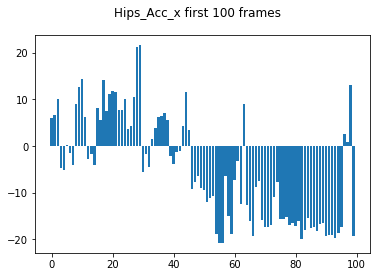

In [120]:
plt.bar(range(100), height=train.X['Hips']['Acc_x'][:100].sum(axis=1))
plt.suptitle('Hips_Acc_x first 100 frames')

0   999
1000   1999
2000   2999
3000   3999
4000   4999
5000   5999
6000   6999
7000   7999
8000   8999
9000   9999


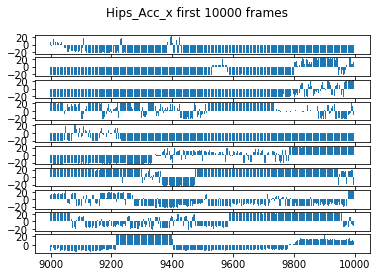

In [123]:
pos = 'Hips'
channel = 'Acc_x'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle('Hips_Acc_x first 10000 frames')
plt.show()

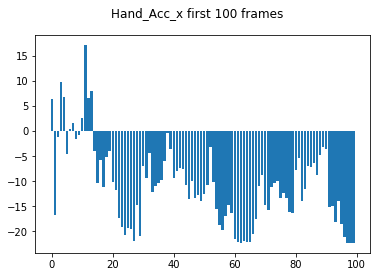

In [124]:
plt.bar(range(100), height=train.X['Hand']['Acc_x'][:100].sum(axis=1))
plt.suptitle('Hand_Acc_x first 100 frames')
plt.show()

Text(0.5, 0.98, 'Hand_Acc_x first 10000 frames')

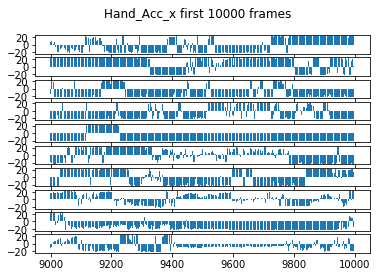

In [125]:
pos = 'Hand'
channel = 'Acc_x'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle('Hand_Acc_x first 10000 frames')

Text(0.5, 0.98, 'Torso_Acc_x first 100 frames')

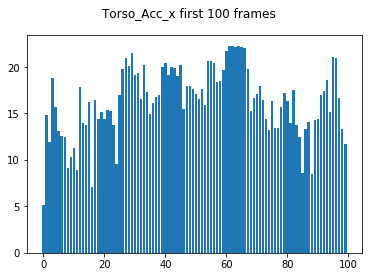

In [126]:
plt.bar(range(100), height=train.X['Torso']['Acc_x'][:100].sum(axis=1))
plt.suptitle('Torso_Acc_x first 100 frames')

Text(0.5, 0.98, 'Torso_Acc_x first 10000 frames')

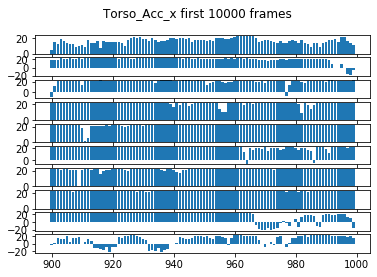

In [127]:
pos = 'Torso'
channel = 'Acc_x'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:1000], 10)):
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle('Torso_Acc_x first 10000 frames')

Text(0.5, 0.98, 'Bag_Acc_x first 100 frames')

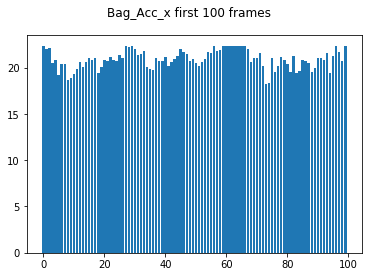

In [128]:
plt.bar(range(100), height=train.X['Bag']['Acc_x'][:100].sum(axis=1))
plt.suptitle('Bag_Acc_x first 100 frames')

Text(0.5, 0.98, 'Bag_Acc_x first 10000 frames')

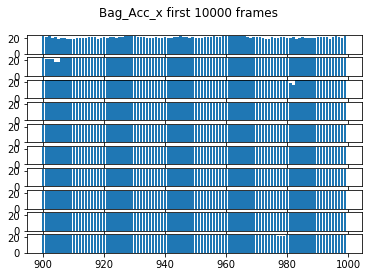

In [129]:
pos = 'Bag'
channel = 'Acc_x'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:1000], 10)):
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle('Bag_Acc_x first 10000 frames')

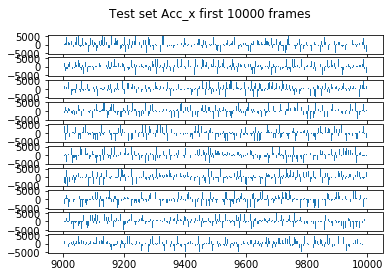

In [11]:
channel = 'Acc_x'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=test.X[channel][portion].sum(axis=1))
plt.suptitle('Test set '+channel+' first 10000 frames')
plt.show()

## _Mag_y_

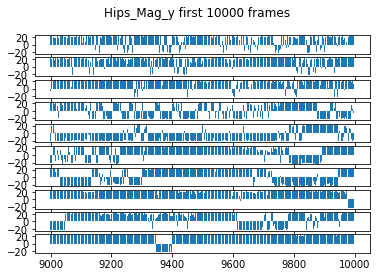

In [7]:
pos = 'Hips'
channel = 'Mag_y'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle(pos+'_'+channel+' first 10000 frames')
plt.show()

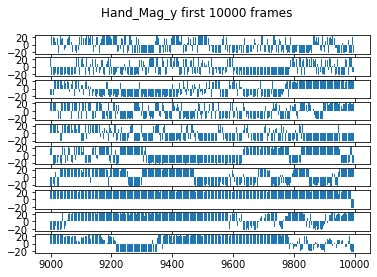

In [8]:
pos = 'Hand'
channel = 'Mag_y'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle(pos+'_'+channel+' first 10000 frames')
plt.show()

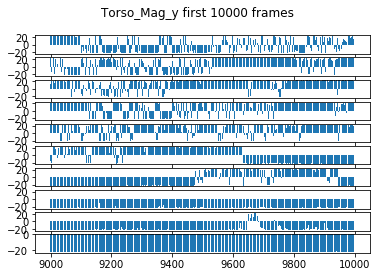

In [6]:
pos = 'Torso'
channel = 'Mag_y'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle(pos+'_'+channel+' first 10000 frames')
plt.show()

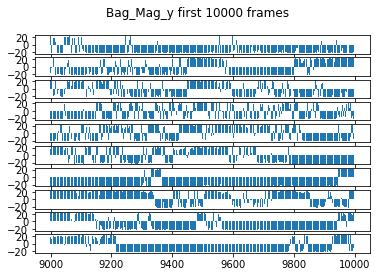

In [9]:
pos = 'Bag'
channel = 'Mag_y'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle(pos+'_'+channel+' first 10000 frames')
plt.show()

### Test set

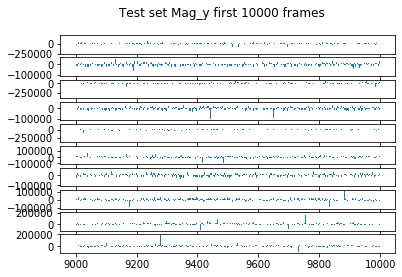

In [10]:
channel = 'Mag_y'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=test.X[channel][portion].sum(axis=1))
plt.suptitle('Test set '+channel+' first 10000 frames')
plt.show()

## _Mag_m_

0   999
1000   1999
2000   2999
3000   3999
4000   4999
5000   5999
6000   6999
7000   7999
8000   8999
9000   9999


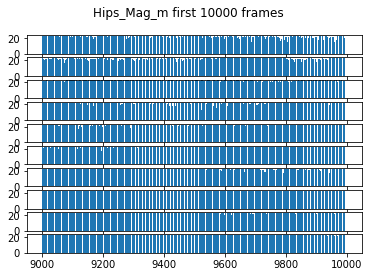

In [131]:
pos = 'Hips'
channel = 'Mag_m'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle('Hips_Mag_m first 10000 frames')
plt.show()

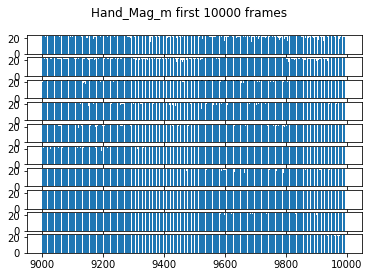

In [133]:
pos = 'Hand'
channel = 'Mag_m'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle('Hand_Mag_m first 10000 frames')
plt.show()

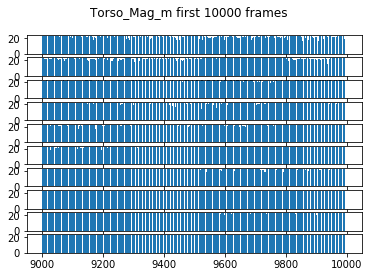

In [134]:
pos = 'Torso'
channel = 'Mag_m'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle(pos+'_'+channel+' first 10000 frames')
plt.show()

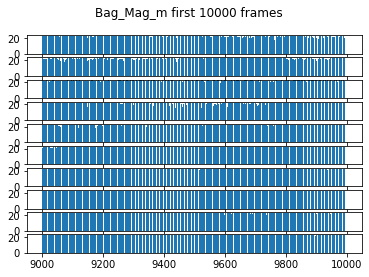

In [135]:
pos = 'Bag'
channel = 'Mag_m'

fig, axes = plt.subplots(10, 1)
for i, portion in enumerate(np.array_split(range(train.y.shape[0])[:10000], 10)):
    # print(portion[0], ' ', portion[-1])
    axes[i].bar(portion, height=train.X[pos][channel][portion].sum(axis=1))
plt.suptitle(pos+'_'+channel+' first 10000 frames')
plt.show()

# Determine Position Based on Extracted Spectral Features

In [1]:
from dataset import DataReader
import numpy as np

# validation data
def load_data(what='validation'):
    data = DataReader(what=what)
    data.normalize_NOT_in_place()
    
    examples = {}
    labels = []
    for label, position in enumerate(data.smartphone_positions):
        for _, channel in data.channels.items():
            if channel.endswith('spectralfeatures'):
                e = data.X[position][channel]
                if channel not in examples:
                    examples[channel] = e
                else:
                    examples[channel] = np.concatenate((examples[channel], e))
    
                print('examples[',channel,'].shape = ', examples[channel].shape)

        labels = np.concatenate((labels,
                                np.repeat(label, repeats=e.shape[0], axis=0)))
    
    return examples, labels

valid_dict, valid_labels = load_data(what='validation')

generated/0.5/validation/validation_Torso_Acc_x.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_y.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_z.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Pressure.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_m.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Gyr_m.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Mag_m.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Ori_m.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Gra_m.mmap exists, loading ...
generated/0.5/validation/validation_Torso_LAcc_m.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_x_spectralfeatures.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_y_spectralfeatures.mmap exists, loading ...
generated/0.5/validation/validation_Torso_Acc_z_spectralfeatures.mmap exists, loading 

In [2]:
np.bincount(valid_labels.astype(int))

array([28789, 28789, 28789, 28789])

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Model, layers, regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import (Conv2D, Dense, Dropout, Flatten, MaxPool2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


inputs = []
xs = []
for _, channel in DataReader.channels.items():
    
    if channel.endswith('spectralfeatures'):
        print('circuit of channel {}'.format(channel))
        modality = DataReader.channel_to_modality(channel)
    
        if channel.startswith('Acc') and channel.endswith('spectralfeatures'):
            input_length=60
        elif channel == 'Mag_spectralfeatures':
            input_length=73
        else:
            raise Exception('toto')
    
        # 3D tensor with shape: (batch_size, steps, input_dim)
        ts = keras.Input(shape=(input_length,), name=channel)
        x = layers.Reshape((input_length, 1))(ts)
        
        x = layers.Dense(
            # 8,  # as the number of classes. In order to be used as output layer during validation and test!
            # activation='softmax',
            64,
            activation='relu',
            kernel_regularizer=regularizers.l2(0.001),
            bias_regularizer=regularizers.l2(0.001),
            activity_regularizer=regularizers.l2(0.001),
            # name='view_'+position
        )(x)
        # x = layers.Dropout(params['All']['dropout']['3'])(x)
        x = layers.Dropout(0.5)(x)
        
        inputs.append(ts)
        xs.append(x)

x = layers.concatenate(xs, axis=1)
class_output = layers.Dense(4, activation='softmax', name='class_output')(x)

model = keras.Model(inputs=inputs, outputs=class_output)

circuit of channel Acc_x_spectralfeatures
circuit of channel Acc_y_spectralfeatures
circuit of channel Acc_z_spectralfeatures
circuit of channel Mag_spectralfeatures


In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),  # , amsgrad=True),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc'
             # , lr_metric
             ])

history = model.fit(
    valid_dict,
    to_categorical(valid_labels, num_classes=4),
    batch_size=256,
    epochs=50,
    #callbacks=[
    #    ReportIntermediates(),
    #    cp_callback
    #],
    validation_split=0.3,
    # validation_data=(validation_dict, to_categorical(validation_labels, num_classes=num_classes)),
    shuffle=True,
    #class_weight={0: 2.,
    #              1: 1.,  # give class run 10 times the weight of class 0
    #              2: 4.
    #              }
)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run GatherV2: Dst tensor is not initialized. [Op:GatherV2]

In [ ]:
# SVM classification
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

print('standardizing...')
scaler = preprocessing.StandardScaler().fit(val_repr)

print('training SVM...')
clf = svm.LinearSVC(C=10, dual=False)
#clf = svm.SVC(kernel='rbf')
clf.fit(
    #scaler.transform(
        train_repr
    #)
    , train_labels)

print('testing...')
p = clf.predict(
    #scaler.transform(
        val_repr
    #)
)
test_acc = accuracy_score(validation_labels, p)
print(test_acc)